# Assignment Multivariate Linear Regression 
Group 3:
- 2502398571 Muhammad Rikhza Maulana
- 2502398615 Anatha Pindhika Hermawan
- 2502399366 Gabriel Rolly Davinsi

Load Class & Lib

In [242]:
class LinearRegressionClass:
    def __init__(self,X,Y): 
        ones=np.ones(X.shape)
        X=np.append(ones,X,axis=1)
        self.X=X
        self.Y=Y
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.theta=np.random.randn(X.shape[1])
        
    def computeCostFunction(self):
        h=np.matmul(self.X,self.theta)
        self.J=(1/(2*self.m))*np.sum((h-self.Y)**2)
        return self.J
    
    def performGradientDescent(self,num_of_iter,alpha):
        self.Cost_history=[]
        self.theta_history=[]
        for x in range(num_of_iter):
            h=np.matmul(self.X,self.theta)
            J=self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp=h-self.Y
            self.theta=self.theta-(alpha/self.m)*(self.X.T.dot(temp))
        return self.theta,self.Cost_history,self.theta_history
            
        
    def predict(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        self.Y_pred=np.matmul(X_test,self.theta)
        self.error_percentage=(abs(self.Y_pred-Y_test)/Y_test)*100
        return self.Y_pred,self.error_percentage
    
    def predictUsingNormalEquation(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        # code ini yang diubah
        pinv=np.linalg.pinv(np.matmul(self.X.T,self.X))
        self.w=np.matmul(np.matmul(pinv,self.X.T),self.Y)
        y_pred=np.matmul(X_test,self.w)
        return y_pred,(abs(Y_test-y_pred)/Y_test)*100
        
        
        
    def returnTheta(self):
        return self.theta
    
    def returnX(self):
        return self.X
        
    def returnY(self):
        return self.Y

In [243]:
class FeatureScalingClass:
    def __init__(self,X,y):
        self.X=X.copy()
        if y.ndim==1:
            y=np.reshape(y,(y.shape[0],1))
        self.y=y.copy()
        self.minMax_X={}
        self.minMax_y={}
    
    def fit_transform_X(self):
        num_of_features=self.X.shape[1]
        for i in range(num_of_features):
            feature=self.X[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_X[i]=np.array([Mean,Min,Max])
            self.X[:,i]=feature
        return self.X.copy()
    
    def fit_transform_Y(self):
        num_of_features = self.y.shape[1]
        for i in range(num_of_features):
            feature = self.y[:, i]
            Mean = np.mean(feature)
            Min = np.min(feature)
            Max = np.max(feature)
            feature = (feature - Mean) / (Max - Min)
            self.minMax_y[i] = np.array([Mean, Min, Max])
            self.y[:, i] = feature
        return np.reshape(self.y, self.y.shape[0])
    
    def inverse_transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_X[i][1]
            Max=self.minMax_X[i][2]
            feature=feature*(Max-Min)+Mean
            X_transformed[:,i]=feature
        return X_transformed
    
    def inverse_transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=feature*(Max-Min)+Mean
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            X_transformed[:,i]=feature
        return X_transformed
    
    def transform_Y(self, y):
        y_transformed = y.copy()
        if y_transformed.ndim == 1:
            y_transformed = np.reshape(y_transformed, (y_transformed.shape[0], 1))
        num_of_features = y_transformed.shape[1]
        for i in range(num_of_features):
            feature = y_transformed[:, i]
            Mean = self.minMax_y[i][0]
            Min = self.minMax_y[i][1]
            Max = self.minMax_y[i][2]
            feature = (feature - Mean) / (Max - Min)
            y_transformed[:, i] = feature
        return np.reshape(y_transformed, y_transformed.shape[0])
    
    def returnX(self):
        return self.X
    
    def returnY(self):
        return self.y
        

In [244]:
# Load Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load Dataset & Sneak Peak Data

In [245]:
# Melihat 5 baris terbawah dari data
# Independent Variable (x): R&D Spend, Administration, Marketing Spend, State
# Dependent Variable (y): Profit
df=pd.read_csv('Startups.csv')
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [246]:
# Melihat jumlah kolom dan baris dari data
# 5 Features; 50 Row
df.shape

(50, 5)

In [247]:
# Deskripsi Statistika Data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Cleansing Data

In [248]:
# Encode kolom "state" untuk menangani variabel kategorikal
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

#Reshape
state_encoded = encoder.fit_transform(df['State'].values.reshape(-1, 1))

# Convert the encoded result into a DataFrame with column names
state_encoded_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['State']))

# Concatenate the encoded DataFrame with the original data and drop the original 'State' column
data_encoded = pd.concat([df.drop('State', axis=1), state_encoded_df], axis=1)

# Display the first few rows of the modified dataframe
data_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [249]:
data_cleaned_sklearn = data_encoded[data_encoded['R&D Spend'] != 0].copy()
data_cleaned_custom = data_encoded[data_encoded['R&D Spend'] != 0].copy()

In [250]:
# Memindahkan kolom Profit ke kolom paling akhir
data_cleaned_custom = data_encoded[[col for col in data_encoded.columns if col != 'Profit'] + ['Profit']]

In [251]:
# Deskripsi Statistika Data Encoded
data_cleaned_sklearn.info()
data_cleaned_sklearn.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 48
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         48 non-null     float64
 1   Administration    48 non-null     float64
 2   Marketing Spend   48 non-null     float64
 3   Profit            48 non-null     float64
 4   State_California  48 non-null     float64
 5   State_Florida     48 non-null     float64
 6   State_New York    48 non-null     float64
dtypes: float64(7)
memory usage: 3.0 KB


,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,76793.349583,121142.109583,218876.704792,115487.308958,0.312500,0.333333,0.354167
std,44224.086236,28526.050007,118303.028079,37110.594903,0.468417,0.476393,0.483321
min,542.050000,51283.140000,0.000000,35673.410000,0.000000,0.000000,0.000000
25%,45528.002500,102579.505000,136984.482500,95036.680000,0.000000,0.000000,0.000000
50%,74661.715000,122699.795000,221897.880000,108643.015000,0.000000,0.000000,0.000000
75%,105065.712500,145190.700000,300632.782500,142253.990000,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [252]:
# Nilai korelasi antar variabel (jinja2 library)
# R&D Spend mempunyai hubungan linear yang positif sangat kuat dengan profit jika dibandingkan dengan yang lain
# nilai state semuanya hampir mendekati 0 menandakan bahwa state tidak mempengaruhi pada profit
data_cleaned_sklearn.corr().style.background_gradient()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.269749,0.692436,0.977401,-0.054148,0.063513,-0.010124
Administration,0.269749,1.000000,-0.019377,0.235033,-0.026833,0.015701,0.010530
Marketing Spend,0.692436,-0.019377,1.000000,0.719647,-0.086438,0.171828,-0.085593
Profit,0.977401,0.235033,0.719647,1.000000,-0.028351,0.063288,-0.034904
State_California,-0.054148,-0.026833,-0.086438,-0.028351,1.000000,-0.476731,-0.499266
State_Florida,0.063513,0.015701,0.171828,0.063288,-0.476731,1.000000,-0.523635
State_New York,-0.010124,0.010530,-0.085593,-0.034904,-0.499266,-0.523635,1.000000


Modelling

In [253]:
# Membuat variabel x dan y (sklearn model)
x = data_cleaned_sklearn.drop(columns='Profit')
y = data_cleaned_sklearn['Profit'];

#training and testing size (custom model)
train_size=int(0.7*data_cleaned_custom.shape[0])
test_size=int(0.3*data_cleaned_custom.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

#shuffle the dataset (custom model)
data_cleaned_custom = data_cleaned_custom.sample(frac=1)
X=data_cleaned_custom.iloc[:,0:6].values
Y=data_cleaned_custom.iloc[:,6].values

Training set size : 35
Testing set size : 15


In [254]:
# Split data training dan testing dengan porsi 80:20 (Sklearn split)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=5)

# Split data training dan testing (custom model)
fs=FeatureScalingClass(X,Y)
X=fs.fit_transform_X()
Y=fs.fit_transform_Y()

#training set split (custom model)
X_train=X[0:train_size,:]
Y_train=Y[0:train_size]

#testing set split (custom model)
X_test=X[train_size:,:]
Y_test=Y[train_size:]

In [255]:
# Cek shape data training dan testing (sklearn)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Cek shape data training dan testing (custom model)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(32, 6)
(32,)
(16, 6)
(16,)
(35, 6)
(35,)
(15, 6)
(15,)


Training Model

In [256]:
# Lin Reg (sklearn)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# lr (custom model)
lr=LinearRegressionClass(X_train,Y_train)

In [257]:
#training set prediction (custom model - normal equation)
y_pred_train_normal,error_percentage_train_normal=lr.predictUsingNormalEquation(X_train,Y_train)
y_pred_train_normal=fs.inverse_transform_Y(y_pred_train_normal)
print(lr.computeCostFunction())

#testing set prediction (custom model - normal equation)
y_pred_normal,error_percentage=lr.predictUsingNormalEquation(X_test,Y_test)
y_pred_normal=fs.inverse_transform_Y(y_pred_normal)
print(error_percentage)

#learning parameters
n_iter=3000
alpha=0.05
theta,J_Array,theta_array=lr.performGradientDescent(n_iter,alpha)

#training set prediction (custom model - gradient descent)
y_pred_train,error_for_train=lr.predict(X_train,Y_train)
y_pred_train=fs.inverse_transform_Y(y_pred_train)
print(error_for_train)

#testing set prediction (custom model - gradient descent)
y_pred_grad,ErrorPercentage=lr.predict(X_test,Y_test)
print(ErrorPercentage)
y_pred_grad=fs.inverse_transform_Y(y_pred_grad)

2.216881919262337
[ -15.4504425  -124.4693899     5.64875589   22.60246223  -20.21947023
  -20.03840334  -32.11429446  108.29252714   -9.20015576   60.14909255
   -1.59025929 -158.39896875    2.04984216 -384.70864205   96.14589418]
[  -13.50521635    18.24314997   -22.72037384   -66.64509937
    68.65578105   -21.07379539    24.93810847    33.52970947
    30.82883887     5.06924841   -12.6337737     -3.59437821
   -11.91091474    16.64568814     7.83674691   -58.61476159
   -34.97932767     6.17678787    -2.96437574    31.01710323
    22.5561318     -3.62531704 -1128.0071065    -32.7547659
    53.58717401  -214.76861811    15.87481821    -7.23142136
    46.16677874     6.04251837   -24.61216152  -107.11879965
    -4.84598263  -109.10196294    -4.49843477]
[ -13.32775246 -126.4382054     5.81088993   22.75490079  -20.22514854
  -19.94312603  -31.37930117  108.10995644   -7.24873626   60.27942031
   -1.35832485 -163.73236882    1.96809356 -392.54993485   95.3472913 ]


In [258]:
#inverse scaling the features
X_train=fs.inverse_transform_X(X_train)
Y_train=fs.inverse_transform_Y(Y_train)
X_test=fs.inverse_transform_X(X_test)
Y_test=fs.inverse_transform_Y(Y_test)

Visualization

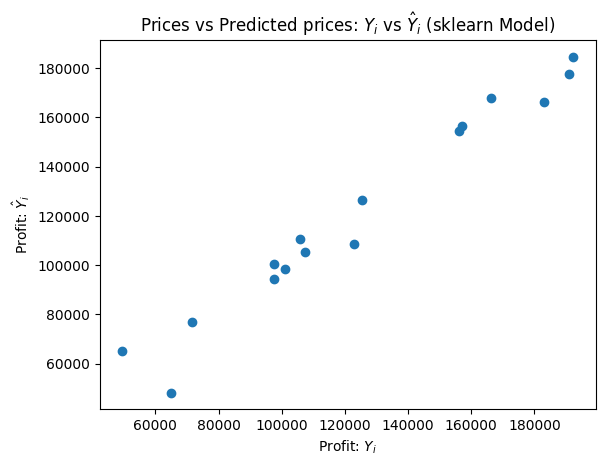

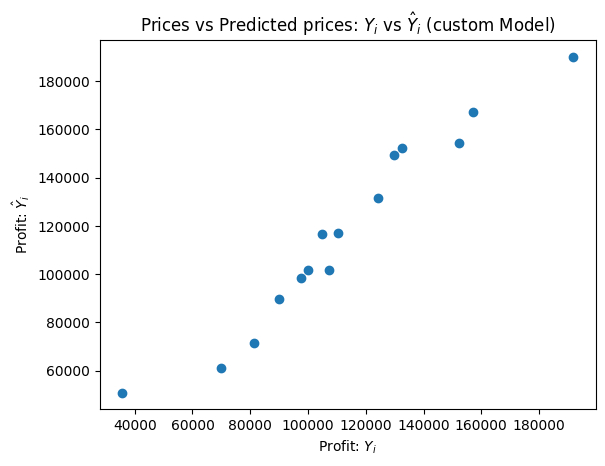

In [259]:
# y Pred (sklearn)
y_pred_sklearn = lin_reg.predict(x_test)

plt.scatter(y_test, y_pred_sklearn)
plt.xlabel(r"Profit: $Y_i$")
plt.ylabel(r"Profit: $\hat{Y}_i$")
plt.title(r"Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ (sklearn Model)")
plt.show()

# y Pred (custom model)
y_pred_sklearn = lin_reg.predict(x_test)

plt.scatter(Y_test, y_pred_grad)
plt.xlabel(r"Profit: $Y_i$")
plt.ylabel(r"Profit: $\hat{Y}_i$")
plt.title(r"Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ (custom Model)")
plt.show()

Evaluate Model

In [260]:
# accuracy score (sklearn model)
print("sklearn model accuracy: ",lin_reg.score(x_train, y_train))

# accuracy score (custom model)
print("custom model accuracy: ",lin_reg.score(X_train, Y_train))

sklearn model accuracy:  0.9469758016775477
custom model accuracy:  0.9342743412703763


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


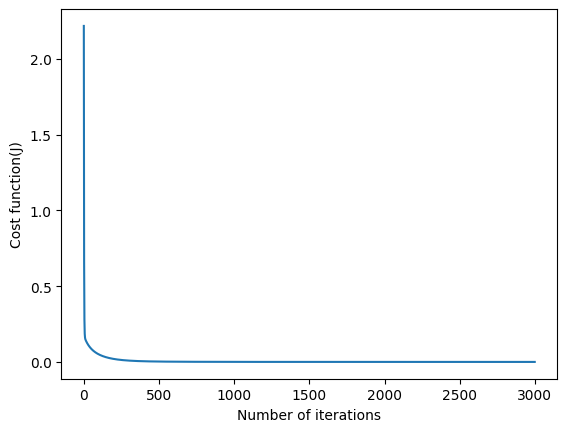

In [261]:
#plot of how cost function is minimized as number of iterations is proceeded
x=[i for i in range(3000)]
plt.plot(x,J_Array)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function(J)')
plt.show()

In [262]:
# MSE R2 Matrix (sklearn model)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_sklearn)
r_squared = r2_score(y_test, y_pred_sklearn)

print("Mean Squared Error (MSE) Sklearn Model:", mse)
print("R-squared (R^2): Custom Model", r_squared)

# MSE R2 Matrix (custom model)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred_grad)
r_squared = r2_score(Y_test, y_pred_grad)

print("Mean Squared Error (MSE) Sklearn Model:", mse)
print("R-squared (R^2): Custom Model", r_squared)

Mean Squared Error (MSE) Sklearn Model: 82959245.02096318
R-squared (R^2): Custom Model 0.9570045650020255
Mean Squared Error (MSE) Sklearn Model: 102480205.19060698
R-squared (R^2): Custom Model 0.9245591701472681
